In [1]:
import pandas as pd

def abs_error(real_val, pred):
    return abs(real_val - pred)
    
def find_min(real_val,pred_0,pred_1,pred_2,pred_3,pred_4):
    res = []
    res.append(abs_error(real_val, pred_0))
    res.append(abs_error(real_val, pred_1))
    res.append(abs_error(real_val, pred_2))
    res.append(abs_error(real_val, pred_3))
    res.append(abs_error(real_val, pred_4))
   
    return (res.index(min(res))) 
                      

In [2]:
lstm = open("pred-lstm.txt")
arima = open("pred-arima.txt")
real = open("pred-real.txt")
gru = open("pred-gru.txt")
svm = open("pred-svm.txt")
trans = open("pred-trans.txt")

a = lstm.readline()
b = arima.readline()
c = real.readline()
d = gru.readline()
e = svm.readline()
f = trans.readline()

lstm = []
arima = []
real = []
gru = []
svm = []
trans = []


for i in a.split(','):
    lstm.append(float(i))
    
for i in b.split(','):
    arima.append(float(i))

for i in c.split(','):
    real.append(float(i))
    
for i in d.split(','):
    gru.append(float(i))
    
for i in e.split(','):
    svm.append(float(i))
    
for i in f.split(','):
    trans.append(float(i))
    
arima.pop()
arima.pop()

real.pop()
real.pop()

svm.pop()


lstm = lstm[(1030-968):]
arima = arima[(1030-967):]
real = real[(1030-967):]
gru = gru[(1030-967):]
svm = svm[(1030-967):]

print(len(lstm))
print(len(arima))
print(len(real))
print(len(gru))
print(len(svm))
print(len(trans))

967
967
967
967
967
967


In [14]:
counter = [0,0,0,0,0]

for i in range (int(len(real)*0.5), len(real)):
    result = find_min(real[i],arima[i],lstm[i],gru[i],svm[i],trans[i])
    
    counter[result] += 1

for i in counter:
    i = i *100/(len(real))




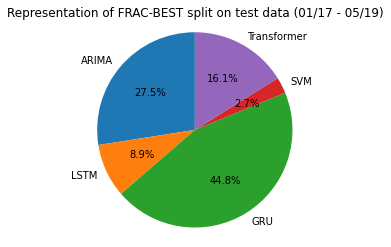

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'ARIMA', 'LSTM', 'GRU', 'SVM', 'Transformer'

fig1, ax1 = plt.subplots()
ax1.pie(counter, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Representation of FRAC-BEST split on test data (01/17 - 05/19)")

plt.show()

In [6]:
#SMAPE
import numpy as np
from math import sqrt
def smape(A, F):
    A = np.array(A)
    F = np.array(F)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#RMSE
from sklearn.metrics import mean_squared_error as mse


#MAE
from sklearn.metrics import mean_absolute_error as mae

In [7]:
print(smape(real,trans))
print(mse(real, trans))
print(mae(real, trans))
print(sqrt(mse(real, trans)))

2.7678149104639824
3.8337498412893334
1.2658626354995643
1.9579963843912822


In [8]:
from sklearn.metrics import r2_score
r2_score(real, trans, multioutput='variance_weighted')

0.9729075168594703